In [5]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DISSERTATION/Data_Train.csv')

In [6]:
data.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [50]:
print("Original dataset shape:", data.shape)

Original dataset shape: (87500, 31)


In [51]:
# Checking data types of each features in our data
data.dtypes

,0
ID,int64
Asst_Reg,int64
GGGrade,object
Experience,object
Validation,object
Yearly_Income,float64
Home_Status,object
Unpaid_2_years,int64
Already_Defaulted,int64
Designation,object


In [52]:

data.isnull().sum()

,0
ID,0
Asst_Reg,0
GGGrade,0
Experience,0
Validation,0
Yearly_Income,0
Home_Status,0
Unpaid_2_years,0
Already_Defaulted,0
Designation,0


In [7]:
import numpy as np


features_with_na=[features for features in data.columns if data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean()*100,5), '% missing values')

Yearly_Income 6.37143 % missing values
Designation 1.616 % missing values
Debt_to_Income 3.98743 % missing values
Postal_Code 1.58743 % missing values
Total_Unpaid_CL 4.784 % missing values
Unpaid_Amount 5.54514 % missing values


# HANDLING MISSING VALUE

In [8]:

data['Yearly_Income'].fillna(data['Yearly_Income'].median(), inplace=True)
data['Debt_to_Income'].fillna(data['Debt_to_Income'].median(), inplace=True)
data['Total_Unpaid_CL'].fillna(data['Total_Unpaid_CL'].median(), inplace=True)
data['Unpaid_Amount'].fillna(data['Unpaid_Amount'].median(), inplace=True)


data['Designation'].fillna(data['Designation'].mode()[0], inplace=True)
data['Postal_Code'].fillna(data['Postal_Code'].mode()[0], inplace=True)


In [9]:
 print("Total null values in the dataset:",data.isnull().sum().sum())

Total null values in the dataset: 0


In [10]:

data.describe().round(2)

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00,87500.00
mean,83946.25,3798914.12,133556.06,0.33,0.01,30.91,51533.90,25920.54,0.20,16.52,95.52,0.67,236389.46,39.46,22.02,12.78,52618.27,29076.08,0.32,0.19
std,36100.10,2289038.08,95755.09,0.88,0.08,13.80,31105.62,14433.84,0.65,4.90,40.55,0.96,255056.78,391.92,6.45,5.37,52046.95,36456.88,3.55,0.39
min,21560.00,24847.00,8800.00,0.00,0.00,0.00,1000.00,1710.00,0.00,8.00,0.00,0.00,0.00,0.00,11.00,2.00,332.00,0.00,0.00,0.00
25%,52616.75,1483874.25,86240.00,0.00,0.00,20.85,23200.00,15048.00,0.00,12.31,66.05,0.00,51734.93,0.00,17.00,9.00,24070.00,11949.48,0.00,0.00
50%,83900.00,4132010.50,114400.00,0.00,0.00,30.14,48100.00,23940.00,0.00,16.49,97.01,0.00,138806.22,0.00,21.00,12.00,39674.00,20892.78,0.00,0.00
75%,115261.25,5952908.75,158400.00,0.00,0.00,40.40,80100.00,34200.00,0.00,20.77,126.59,1.00,353475.54,0.00,26.00,16.00,64408.00,35096.04,0.00,0.00
max,146559.00,7351847.00,8264030.72,18.00,6.00,639.29,99900.00,59850.00,86.00,25.00,1534.76,8.00,5629234.33,26308.47,45.00,83.00,1710630.00,1338777.81,169.05,1.00


# **Analyzing object columns**

In [11]:
import pandas as pd

categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")


Value counts for GGGrade:
GGGrade
II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: count, dtype: int64


Value counts for Experience:
Experience
>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: count, dtype: int64


Value counts for Validation:
Validation
Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: count, dtype: int64


Value counts for Home_Status:
Home_Status
MORTGAGE    44160
RENT        34914
OWN          8416
OTHER           6
NONE            4
Name: count, dtype: int64


Value counts for Designation:
Designation
School Teacher                              2999
Super Lead                                  1322
Nurse                                        743
RN                                           646
Owner                                        623
             

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


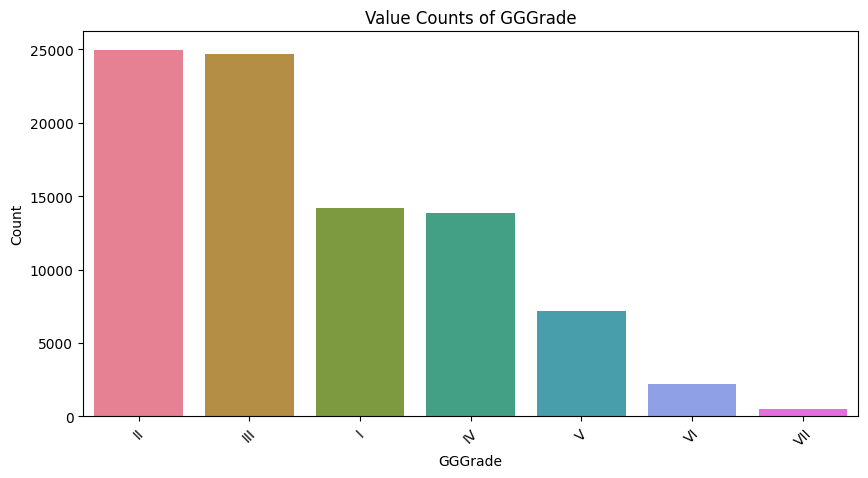

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


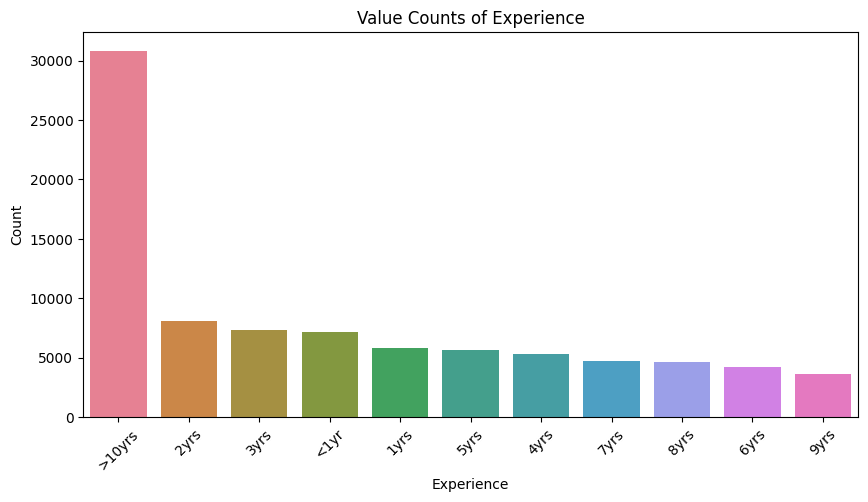

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


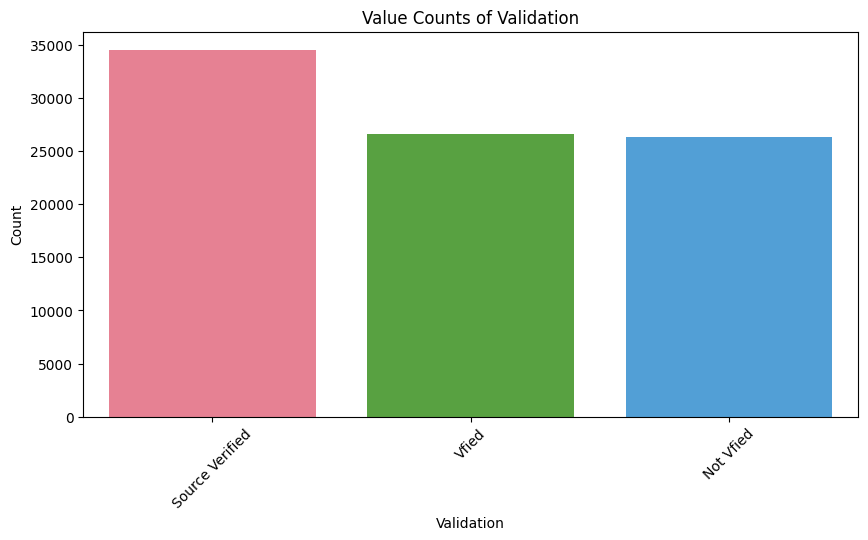

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


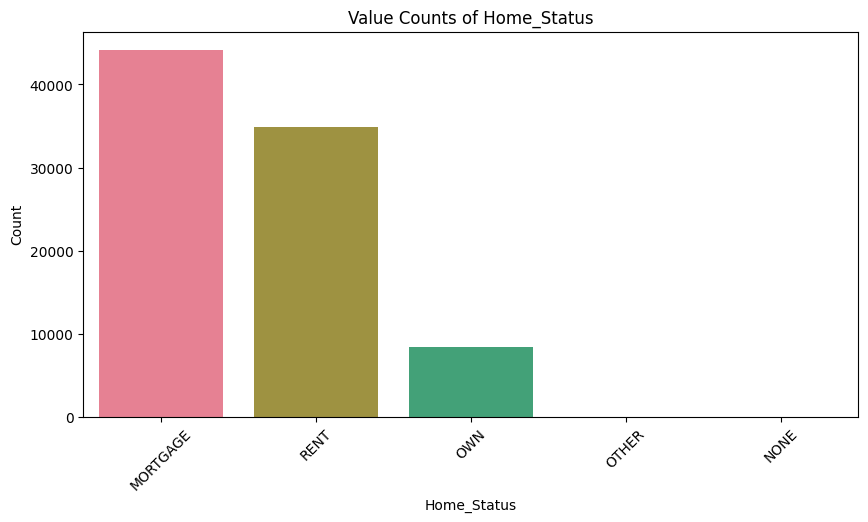

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


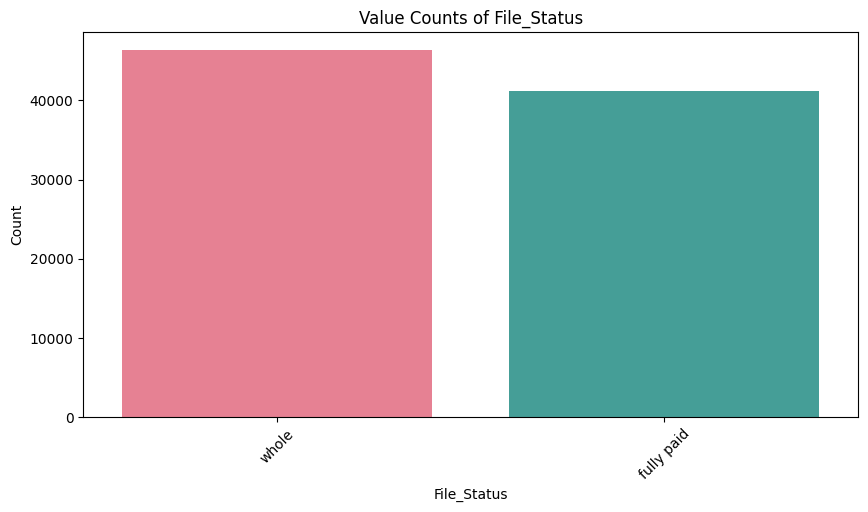

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


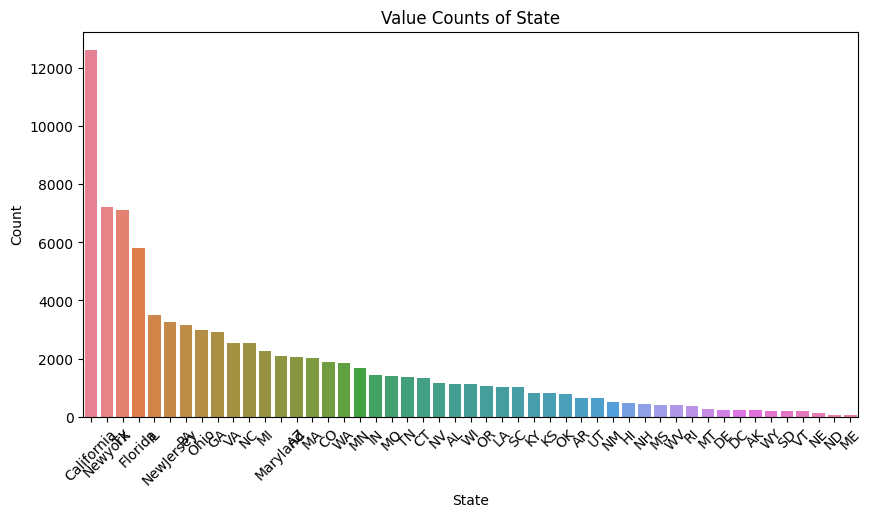

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


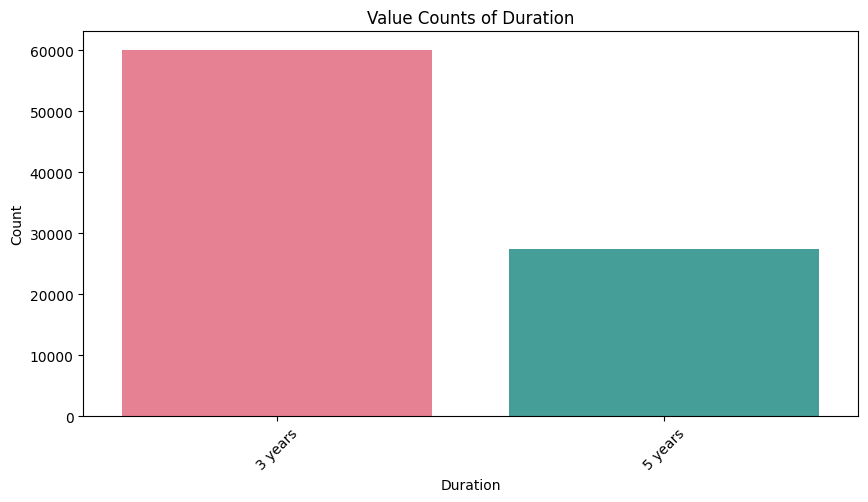

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


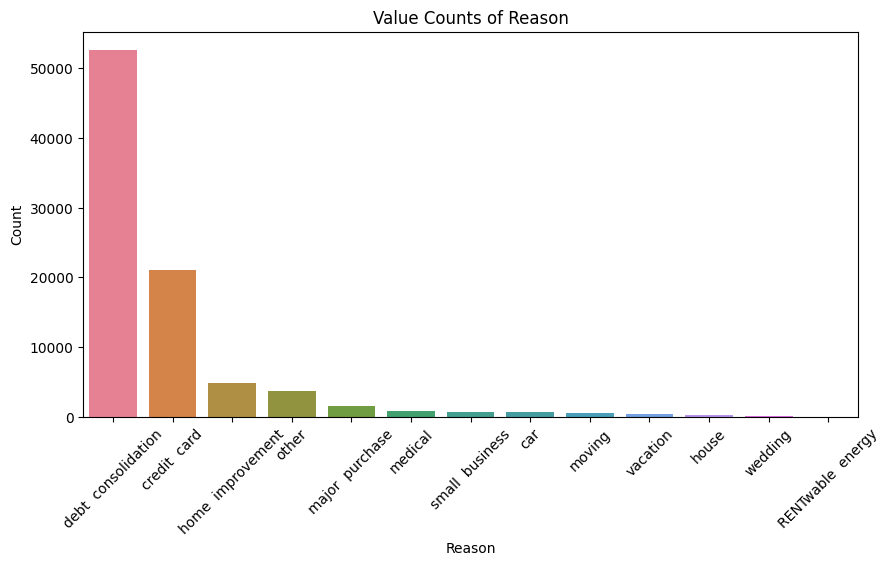

<ipython-input-13-0c158d82916d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')


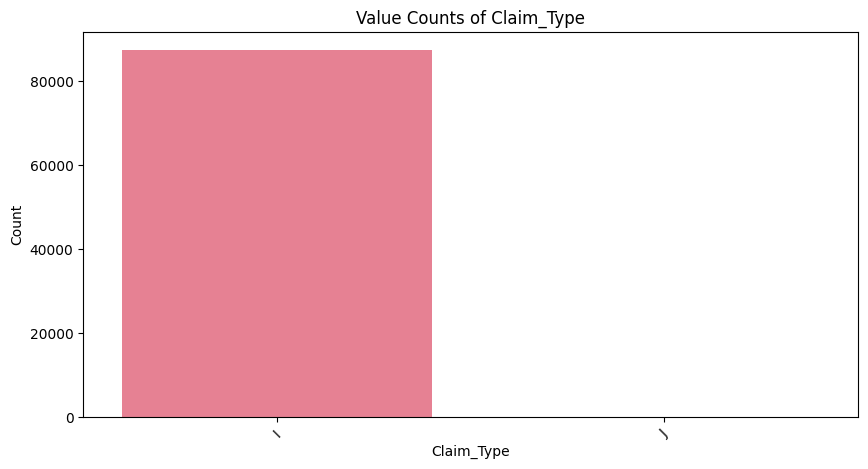

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Designation']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    value_counts = data[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='husl')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Value Counts of {col}')
    plt.xticks(rotation=45)
    plt.show()


***OUTLIER*** ***HANDLING***

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [15]:



features = ['Asst_Reg','Yearly_Income', 'Debt_to_Income', 'Postal_Code', 'Lend_Amount', 'Total_Unpaid_CL',
            'Unpaid_Amount', 'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'Gross_Collection',
            'Unpaid_2_years', 'Already_Defaulted', 'Deprecatory_Records', 'Inquiries', 'Sub_GGGrade',
            'Due_Fee', 'Account_Open']


X = data[features]


iso_forest = IsolationForest(contamination=0.01, random_state=42)


iso_forest.fit(X)


outliers = iso_forest.predict(X)

data['Outlier'] = outliers

outlier_df = data[data['Outlier'] == -1]
print(outlier_df.head())


         ID  Asst_Reg GGGrade Experience       Validation  Yearly_Income  \
121   90061   2871091     VII       <1yr  Source Verified       593120.0   
270  131339   6564227      II       <1yr  Source Verified       290400.0   
327   77451   4399865      II       5yrs            Vfied       528000.0   
491   76536   4557809     III     >10yrs  Source Verified       422400.0   
509  139299   1318697      VI       8yrs  Source Verified       308000.0   

    Home_Status  Unpaid_2_years  Already_Defaulted  \
121        RENT               1                  1   
270         OWN               0                  0   
327    MORTGAGE               0                  0   
491    MORTGAGE               1                  0   
509        RENT               0                  0   

                                 Designation  ...       State  Account_Open  \
121                                SVP Sales  ...     Florida            12   
270               Senior Solution Consultant  ...          I

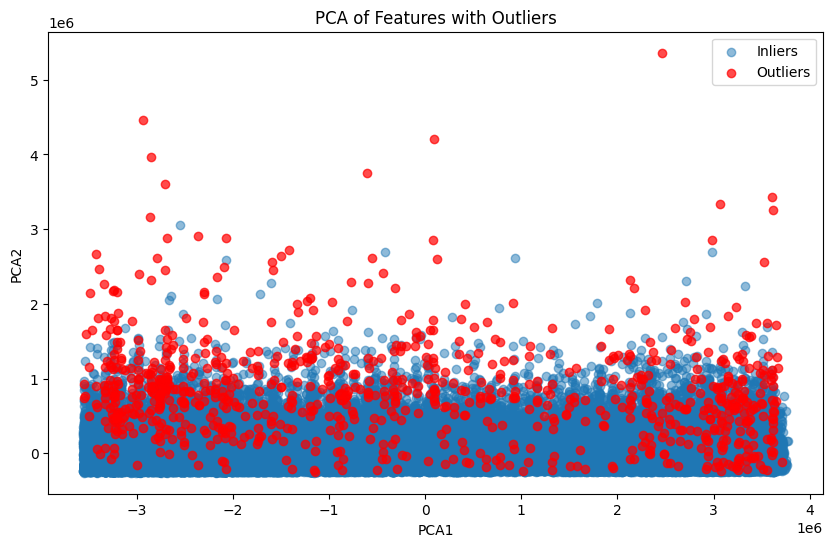

In [17]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Outlier'] = data['Outlier']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[df_pca['Outlier'] == 1]['PCA1'], df_pca[df_pca['Outlier'] == 1]['PCA2'], label='Inliers', alpha=0.5)
plt.scatter(df_pca[df_pca['Outlier'] == -1]['PCA1'], df_pca[df_pca['Outlier'] == -1]['PCA2'], label='Outliers', color='red', alpha=0.7)
plt.title('PCA of Features with Outliers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [18]:
data['Outlier'].value_counts()

,count
Outlier,
1,86625
-1,875


In [ ]:

print(outlier_df.describe())


inlier_rows = df[df['Outlier'] == 1]
print(inlier_rows.describe())


                  ID      Asst_Reg  Yearly_Income  Unpaid_2_years  \
count     875.000000  8.750000e+02   8.750000e+02      875.000000   
mean    83239.664000  3.927807e+06   3.937830e+05        0.803429   
std     37799.170598  2.375704e+06   3.579219e+05        1.597406   
min     21868.000000  8.578200e+04   2.112000e+04        0.000000   
25%     48288.000000  1.467402e+06   1.960640e+05        0.000000   
50%     83993.000000  4.244379e+06   3.080000e+05        0.000000   
75%    116907.000000  6.199737e+06   4.840000e+05        1.000000   
max    146520.000000  7.347607e+06   5.280000e+06       12.000000   

       Already_Defaulted  Debt_to_Income   Postal_Code   Lend_Amount  \
count         875.000000      875.000000    875.000000    875.000000   
mean            0.060571       29.333184  47678.742857  43779.566571   
std             0.316932       14.752801  34266.114060  16173.956067   
min             0.000000        0.134400   1000.000000   2394.000000   
25%             0.

# DATA PREPROCESSING

In [19]:
prep_data=data.copy()

In [20]:

columns_to_remove = ['ID','Sub_GGGrade','Designation','Gross_Collection','Outlier']


new_data=prep_data.drop(columns=columns_to_remove)


print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  int64  
 1   GGGrade              87500 non-null  object 
 2   Experience           87500 non-null  object 
 3   Validation           87500 non-null  object 
 4   Yearly_Income        87500 non-null  float64
 5   Home_Status          87500 non-null  object 
 6   Unpaid_2_years       87500 non-null  int64  
 7   Already_Defaulted    87500 non-null  int64  
 8   Debt_to_Income       87500 non-null  float64
 9   Postal_Code          87500 non-null  float64
 10  Lend_Amount          87500 non-null  float64
 11  Deprecatory_Records  87500 non-null  int64  
 12  Interest_Charged     87500 non-null  float64
 13  Usage_Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  int64  
 15  Present_Balance      87500 non-null 

In [ ]:
new_data.shape

(87500, 26)

# **Encoding categorical variables:**

In [21]:


from sklearn.preprocessing import LabelEncoder


X = new_data.drop('Default', axis=1)
y = new_data['Default']


categorical_columns = ['GGGrade', 'Experience', 'Validation', 'Home_Status','File_Status','Duration', 'Reason', 'Claim_Type','State']
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_columns)


label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le


print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  int64  
 1   GGGrade              87500 non-null  int64  
 2   Experience           87500 non-null  int64  
 3   Validation           87500 non-null  int64  
 4   Yearly_Income        87500 non-null  float64
 5   Home_Status          87500 non-null  int64  
 6   Unpaid_2_years       87500 non-null  int64  
 7   Already_Defaulted    87500 non-null  int64  
 8   Debt_to_Income       87500 non-null  float64
 9   Postal_Code          87500 non-null  float64
 10  Lend_Amount          87500 non-null  float64
 11  Deprecatory_Records  87500 non-null  int64  
 12  Interest_Charged     87500 non-null  float64
 13  Usage_Rate           87500 non-null  float64
 14  Inquiries            87500 non-null  int64  
 15  Present_Balance      87500 non-null 

In [ ]:
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


## **CORRELATION MATRIX**

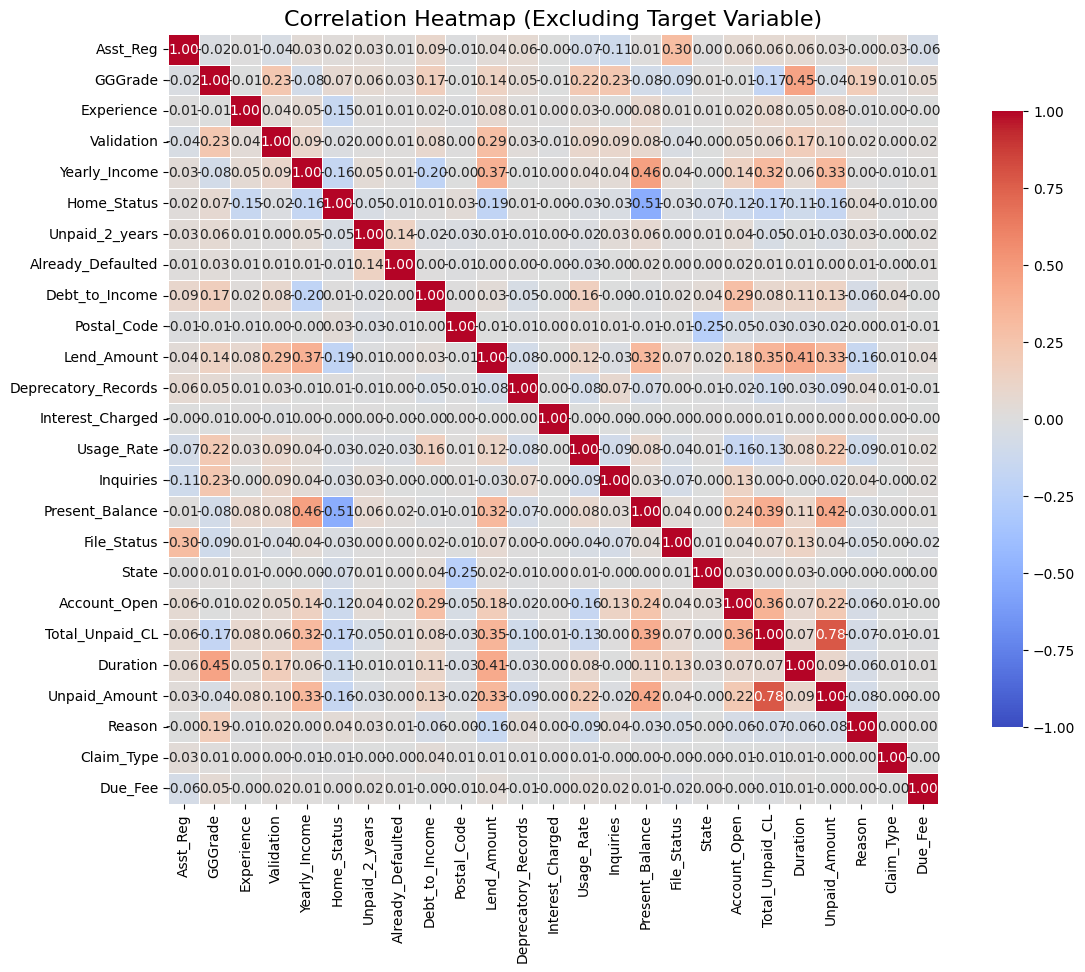

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X.corr()


plt.figure(figsize=(14, 10))


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})


plt.title('Correlation Heatmap (Excluding Target Variable)', fontsize=16)

# Show the plot
plt.show()

# **Standardization and normalization:**

In [23]:
from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()


scaler = StandardScaler()
X_scaled[numeric_columns] = scaler.fit_transform(X_scaled[numeric_columns])

In [24]:
X_scaled.describe()

,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,...,Present_Balance,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee
count,8.750000e+04,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,8.750000e+04,8.750000e+04,8.750000e+04,8.750000e+04,...,8.750000e+04,87500.000000,87500.000000,8.750000e+04,8.750000e+04,87500.000000,8.750000e+04,87500.000000,87500.000000,8.750000e+04
mean,1.380483e-17,1.810686,6.234629,1.003291,-2.476749e-17,1.884800,-1.948917e-18,-6.740005e-18,3.218150e-16,7.893115e-17,...,5.400125e-17,0.529143,22.256731,1.408905e-16,-3.889714e-17,0.313589,7.146030e-17,3.291211,0.000526,-2.030122e-19
std,1.000006e+00,1.303598,3.668031,0.778245,1.000006e+00,1.922969,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,0.499153,14.115867,1.000006e+00,1.000006e+00,0.463954,1.000006e+00,1.759687,0.022923,1.000006e+00
min,-1.648766e+00,0.000000,0.000000,0.000000,-1.302874e+00,0.000000,-3.800328e-01,-6.856808e-02,-2.240378e+00,-1.624600e+00,...,-9.268164e-01,0.000000,0.000000,-2.006922e+00,-1.004604e+00,0.000000,-7.975517e-01,0.000000,0.000000,-8.922763e-02
25%,-1.011365e+00,1.000000,3.000000,0.000000,-4.941391e-01,0.000000,-3.800328e-01,-6.856808e-02,-7.292730e-01,-9.108987e-01,...,-7.239784e-01,0.000000,9.000000,-7.036583e-01,-5.485131e-01,0.000000,-4.697796e-01,3.000000,0.000000,-8.922763e-02
50%,1.455189e-01,2.000000,7.000000,1.000000,-2.000538e-01,0.000000,-3.800328e-01,-6.856808e-02,-5.591213e-02,-1.103955e-01,...,-3.825964e-01,1.000000,21.000000,-1.451166e-01,-2.487052e-01,0.000000,-2.244664e-01,3.000000,0.000000,-8.922763e-02
75%,9.410097e-01,3.000000,10.000000,2.000000,2.594544e-01,4.000000,-3.800328e-01,-6.856808e-02,6.880725e-01,9.183635e-01,...,4.590615e-01,1.000000,35.000000,5.996057e-01,2.265223e-01,1.000000,1.651264e-01,3.000000,0.000000,-8.922763e-02
max,1.552160e+00,6.000000,10.000000,2.000000,8.490955e+01,4.000000,2.016616e+01,7.178421e+01,4.409489e+01,1.554908e+00,...,2.114382e+01,1.000000,48.000000,1.307370e+01,3.185626e+01,1.000000,3.592488e+01,12.000000,1.000000,4.758331e+01


# **Multicoliniarity** **checking**

In [25]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.6 MB/s eta 0:00:00


In [26]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data1 = pd.DataFrame()
vif_data1['Feature'] = X_scaled.columns
vif_data1['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

In [27]:
print(vif_data1)

                Feature       VIF
0              Asst_Reg  1.135647
1               GGGrade  4.899943
2            Experience  3.162924
3            Validation  2.871757
4         Yearly_Income  1.537550
5           Home_Status  2.470248
6        Unpaid_2_years  1.045039
7     Already_Defaulted  1.022507
8        Debt_to_Income  1.293679
9           Postal_Code  1.058730
10          Lend_Amount  1.675184
11  Deprecatory_Records  1.043068
12     Interest_Charged  1.000295
13           Usage_Rate  1.543755
14            Inquiries  1.145963
15      Present_Balance  1.890722
16          File_Status  2.187917
17                State  3.053951
18         Account_Open  1.379949
19      Total_Unpaid_CL  3.806422
20             Duration  2.309812
21        Unpaid_Amount  3.596010
22               Reason  4.348208
23           Claim_Type  1.003525
24              Due_Fee  1.009008


# **Feature ectraction method**

# USING XGBOOST

In [28]:
pip install xgboost


Feature: Asst_Reg, Importance: 0.32082900404930115
Feature: Duration, Importance: 0.15486480295658112
Feature: Due_Fee, Importance: 0.057187557220458984
Feature: Usage_Rate, Importance: 0.02928384393453598
Feature: Inquiries, Importance: 0.02540311962366104
Feature: GGGrade, Importance: 0.025094836950302124
Feature: Debt_to_Income, Importance: 0.02487093210220337
Feature: Yearly_Income, Importance: 0.02422410622239113
Feature: Present_Balance, Importance: 0.024135516956448555
Feature: Unpaid_2_years, Importance: 0.023785827681422234
Feature: Deprecatory_Records, Importance: 0.023686647415161133
Feature: Reason, Importance: 0.02336267940700054


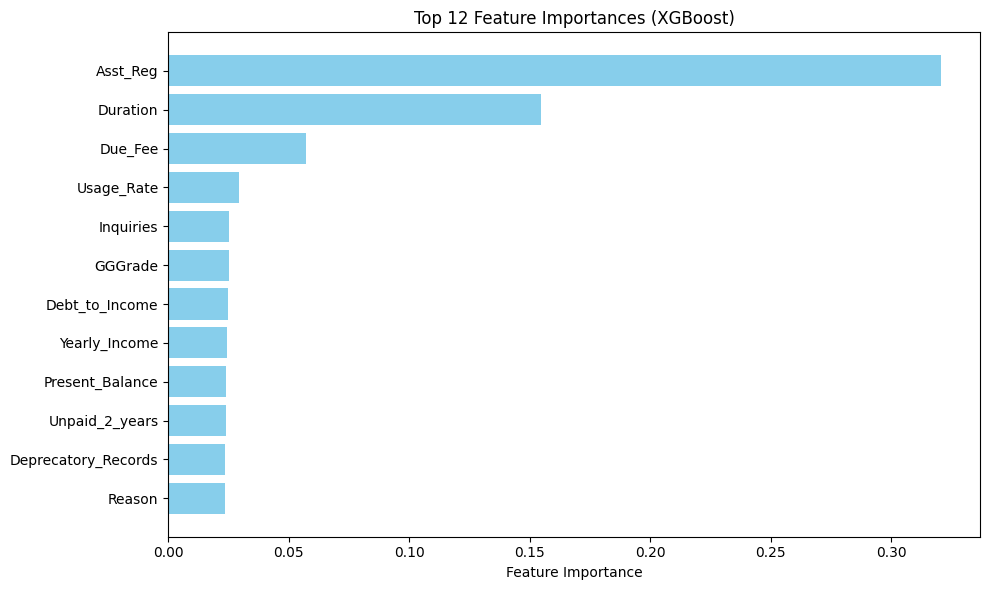

In [29]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


model_xgb = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model_xgb.fit(X_scaled, y)


importances_xgb = model_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

top_features_xgb = []
top_importances_xgb = []
for i in range(12):
    feature_name = X_scaled.columns[indices_xgb[i]]
    top_features_xgb.append(feature_name)
    top_importances_xgb.append(importances_xgb[indices_xgb[i]])
    print(f'Feature: {feature_name}, Importance: {importances_xgb[indices_xgb[i]]}')

plt.figure(figsize=(10, 6))
plt.barh(top_features_xgb[::-1], top_importances_xgb[::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 12 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


X_top_features_xgb = X_scaled[top_features_xgb]


In [ ]:
X_top_features_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  float64
 1   Duration             87500 non-null  int64  
 2   Due_Fee              87500 non-null  float64
 3   Usage_Rate           87500 non-null  float64
 4   Inquiries            87500 non-null  float64
 5   GGGrade              87500 non-null  int64  
 6   Debt_to_Income       87500 non-null  float64
 7   Yearly_Income        87500 non-null  float64
 8   Present_Balance      87500 non-null  float64
 9   Unpaid_2_years       87500 non-null  float64
 10  Deprecatory_Records  87500 non-null  float64
 11  Reason               87500 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 8.0 MB


# **Model building**

train test **split**

In [30]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X_top_features_xgb, y, test_size=0.2, random_state=42)







# **Logistic regression**

Accuracy: 0.83
Precision: 0.63
Recall: 0.25
F1 Score: 0.36
ROC AUC Score: 0.82
Confusion Matrix:
[[13737   489]
 [ 2451   823]]


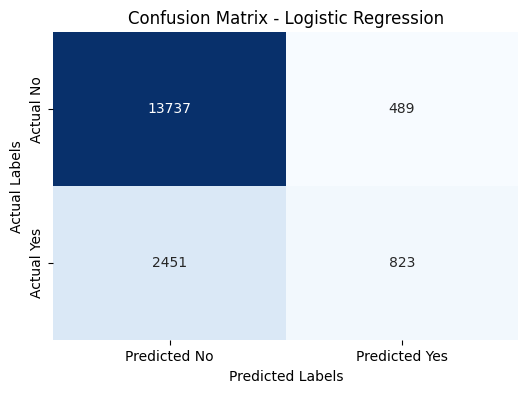

In [31]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()


logistic.fit(X_train, y_train)

y_pred=logistic.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  # Probabilities for ROC AUC


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)



plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

The Model confution matrix  is not is not performing well due the imbalance in the dataset. Lets handle it using

# HANDLING CALSS IMBALANCE

In [33]:
pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00


# **SMOTETomek**

In [34]:

from imblearn.combine import SMOTETomek

ros = SMOTETomek(random_state=42)


X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


counter_smote = Counter(y_resampled)
print("Class distribution after SMOTE:", counter_smote)

Class distribution after SMOTE: Counter({0: 56020, 1: 56020})


Default
0    70988
1    16512
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

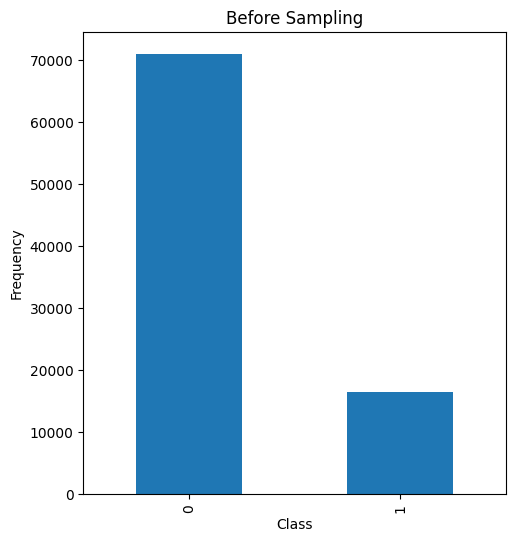

In [35]:
import pandas as pd
import matplotlib.pyplot as plt



print(y.value_counts())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar')
plt.title('Before Sampling')
plt.xlabel('Class')
plt.ylabel('Frequency')

Default
0    56020
1    56020
Name: count, dtype: int64


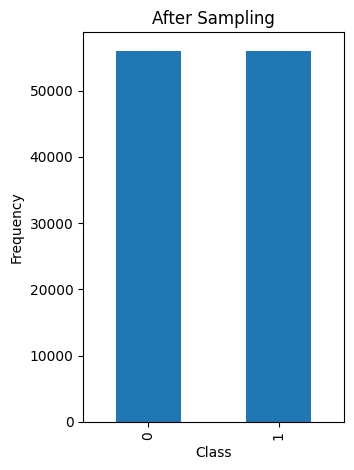

In [36]:


print(y_resampled.value_counts())

plt.subplot(1, 2, 2)
y_resampled.value_counts().plot(kind='bar')
plt.title('After Sampling')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **logistic**

Accuracy: 0.72
Precision: 0.38
Recall: 0.77
F1 Score: 0.51
ROC AUC Score: 0.82
              precision    recall  f1-score   support

           0       0.93      0.71      0.81     14226
           1       0.38      0.77      0.51      3274

    accuracy                           0.72     17500
   macro avg       0.66      0.74      0.66     17500
weighted avg       0.83      0.72      0.75     17500

Confusion Matrix:
[[10115  4111]
 [  744  2530]]


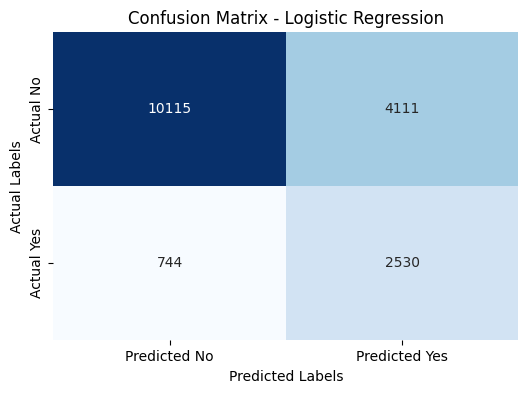

In [37]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logistic = LogisticRegression()
logistic.fit(X_resampled, y_resampled)


y_pred = logistic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])  


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

report = classification_report(y_test, y_pred)
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


# **DT**

ROC AUC Score: 0.64
              precision    recall  f1-score   support

           0       0.87      0.75      0.81     14226
           1       0.33      0.53      0.41      3274

    accuracy                           0.71     17500
   macro avg       0.60      0.64      0.61     17500
weighted avg       0.77      0.71      0.73     17500

Confusion Matrix:
[[10726  3500]
 [ 1539  1735]]


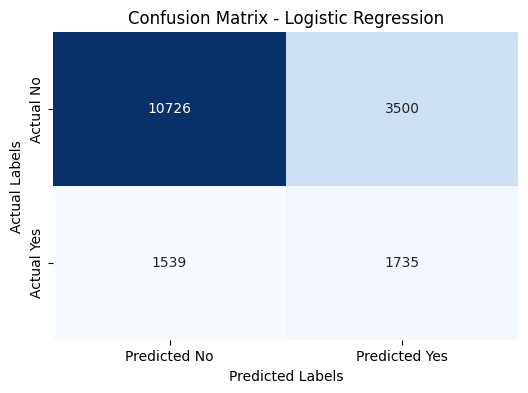

In [38]:
from sklearn.tree import DecisionTreeClassifier



dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_resampled,y_resampled)

y_pred = dt_model.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])  

print(f'ROC AUC Score: {roc_auc:.2f}')
report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB



nb_model = GaussianNB()


nb_model.fit(X_resampled, y_resampled )


y_pred = nb_model.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])  

print(f'ROC AUC Score: {roc_auc:.2f}')
report = classification_report(y_test,y_pred)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

ROC AUC Score: 0.78
              precision    recall  f1-score   support

           0       0.94      0.60      0.73     14226
           1       0.32      0.83      0.46      3274

    accuracy                           0.64     17500
   macro avg       0.63      0.71      0.60     17500
weighted avg       0.82      0.64      0.68     17500

Confusion Matrix:
[[8491 5735]
 [ 567 2707]]


# **RANDOM FOREST**

In [41]:
from sklearn.ensemble import RandomForestClassifier

Randomforest_model = RandomForestClassifier()
Randomforest_model.fit(X_resampled, y_resampled )
y_pred = Randomforest_model.predict(X_test)

ROC AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     14226
           1       0.43      0.58      0.50      3274

    accuracy                           0.78     17500
   macro avg       0.66      0.70      0.68     17500
weighted avg       0.81      0.78      0.79     17500

Confusion Matrix:
[[11701  2525]
 [ 1359  1915]]


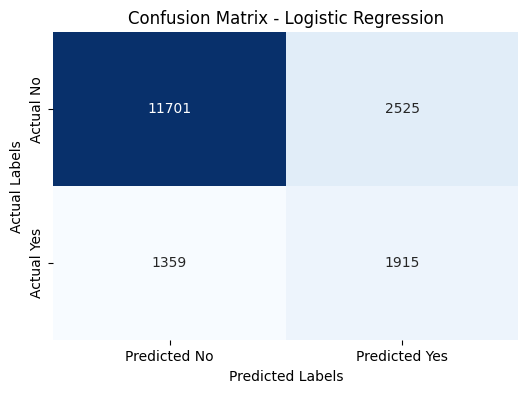

In [42]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, Randomforest_model.predict_proba(X_test)[:, 1])  


print(f'ROC AUC Score: {roc_auc:.2f}')
report = classification_report(y_test,y_pred)
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)



plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()  
knn_model.fit(X_resampled, y_resampled)


y_pred = knn_model.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1]) 

print(f'ROC AUC Score: {roc_auc:.2f}')

report = classification_report(y_test,y_pred)
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

ROC AUC Score: 0.73
              precision    recall  f1-score   support

           0       0.90      0.71      0.79     14226
           1       0.34      0.64      0.44      3274

    accuracy                           0.70     17500
   macro avg       0.62      0.68      0.62     17500
weighted avg       0.79      0.70      0.73     17500

Confusion Matrix:
[[10129  4097]
 [ 1180  2094]]


# **GradientBoosting**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier()
gb_model.fit(X_resampled, y_resampled)

y_pred = gb_model.predict(X_test)


ROC AUC Score: 0.82
              precision    recall  f1-score   support

           0       0.92      0.74      0.82     14226
           1       0.40      0.74      0.52      3274

    accuracy                           0.74     17500
   macro avg       0.66      0.74      0.67     17500
weighted avg       0.83      0.74      0.77     17500

Confusion Matrix:
[[10558  3668]
 [  863  2411]]


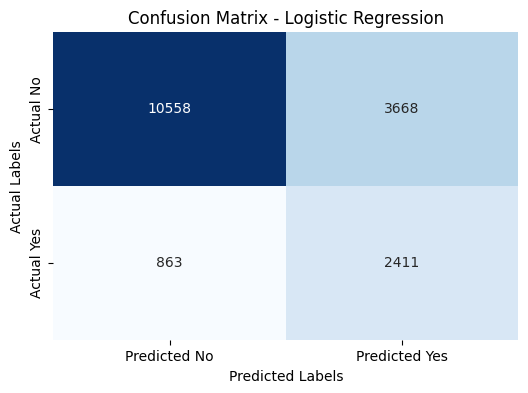

In [44]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]) 



print(f'ROC AUC Score: {roc_auc:.2f}')
report = classification_report(y_test,y_pred)
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# **XGBclassifier**

In [39]:
from xgboost import XGBClassifier



xgb_model = XGBClassifier()

xgb_model.fit(X_resampled, y_resampled)


y_pred = xgb_model.predict(X_test)

ROC AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     14226
           1       0.42      0.61      0.50      3274

    accuracy                           0.77     17500
   macro avg       0.66      0.71      0.67     17500
weighted avg       0.81      0.77      0.78     17500

Confusion Matrix:
[[11441  2785]
 [ 1278  1996]]


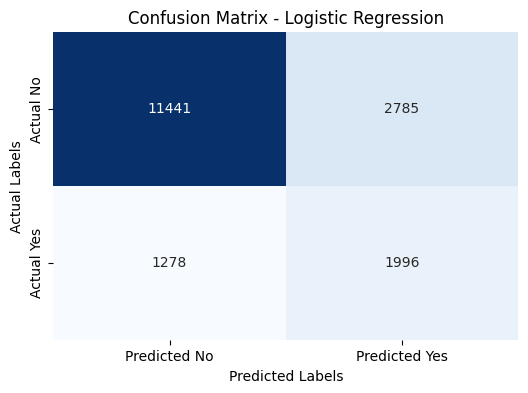

In [40]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,  xgb_model.predict_proba(X_test)[:, 1])  

print(f'ROC AUC Score: {roc_auc:.2f}')

report = classification_report(y_test,y_pred)
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# COMBINED MODEL- VOTING

In [45]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier




rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)


voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')  




voting_clf.fit(X_resampled, y_resampled)


y_pred = voting_clf.predict(X_test)

roc_auc = roc_auc_score(y_test,  voting_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


ROC AUC Score: 0.81
Confusion Matrix:
 [[11639  2587]
 [ 1292  1982]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     14226
           1       0.43      0.61      0.51      3274

    accuracy                           0.78     17500
   macro avg       0.67      0.71      0.68     17500
weighted avg       0.81      0.78      0.79     17500



# **ANN-CLASSIFIER**

In [46]:
pip install tensorflow


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score


In [48]:



model = Sequential()
model.add(Dense(64, input_dim=X_resampled.shape[1], activation='elu'))
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(32, activation='elu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


y_pred = (model.predict(X_test) > 0.5).astype("int32")  # For binary classification




Epoch 1/100
2801/2801 [==============================] - 6s 2ms/step - loss: 0.5269 - accuracy: 0.7350 - val_loss: 0.7134 - val_accuracy: 0.6766
Epoch 2/100
2801/2801 [==============================] - 5s 2ms/step - loss: 0.5034 - accuracy: 0.7492 - val_loss: 0.6642 - val_accuracy: 0.7127
Epoch 3/100
2801/2801 [==============================] - 5s 2ms/step - loss: 0.5008 - accuracy: 0.7501 - val_loss: 0.7267 - val_accuracy: 0.6506
Epoch 4/100
2801/2801 [==============================] - 5s 2ms/step - loss: 0.4998 - accuracy: 0.7516 - val_loss: 0.6790 - val_accuracy: 0.6683
Epoch 5/100
2801/2801 [==============================] - 5s 2ms/step - loss: 0.4984 - accuracy: 0.7510 - val_loss: 0.6836 - val_accuracy: 0.6838
Epoch 6/100
2801/2801 [==============================] - 5s 2ms/step - loss: 0.4979 - accuracy: 0.7518 - val_loss: 0.6832 - val_accuracy: 0.6385
Epoch 7/100
2801/2801 [==============================] - 5s 2ms/step - loss: 0.4971 - accuracy: 0.7512 - val_loss: 0.7019 - val_ac

In [49]:

y_scores = model.predict(X_test).ravel()
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc:.2f}')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

547/547 [==============================] - 1s 1ms/step
ROC AUC Score: 0.82
Accuracy Score: 0.7893714285714286
Confusion Matrix:
 [[11765  2461]
 [ 1225  2049]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.86     14226
           1       0.45      0.63      0.53      3274

    accuracy                           0.79     17500
   macro avg       0.68      0.73      0.70     17500
weighted avg       0.82      0.79      0.80     17500



In [ ]:
# Save the ANN model
model.save('ann_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Hperparameter tunning for random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



Randomforest_model = RandomForestClassifier()


param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}



In [ ]:

random_search = RandomizedSearchCV(
    estimator=Randomforest_model,
    param_distributions=param_distributions,
    n_iter=100,  
    cv=5,       
    verbose=2,   
    random_state=42, 
    n_jobs=-1    
)


random_search.fit(X_resampled, y_resampled)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", 

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Best Score: 0.872179578721885


In [ ]:

best_rf_model = random_search.best_estimator_


y_pred = best_rf_model.predict(X_test)


y_scores = model.predict(X_test).ravel()
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc:.2f}')



report = classification_report(y_test, y_pred)
print("\nClassification Report on Test Set:")
print(report)


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     14226
           1       0.45      0.54      0.49      3274

    accuracy                           0.79     17500
   macro avg       0.67      0.69      0.68     17500
weighted avg       0.81      0.79      0.80     17500

Confusion Matrix:
[[12011  2215]
 [ 1494  1780]]


# **XGB** **TUNNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier



In [ ]:
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 15, 1),
    'learning_rate': np.linspace(0.01, 0.3, 20),
    'subsample': np.linspace(0.6, 1.0, 10),
    'colsample_bytree': np.linspace(0.6, 1.0, 10),
    'gamma': np.linspace(0, 0.5, 10),
    'reg_alpha': np.logspace(-4, 1, 10),
    'reg_lambda': np.logspace(-4, 1, 10),
}


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:02:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
       2.78255940e+00, 1.00000000e+01]),
                                        'reg_lambda': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'subsample': array([0.6       , 0.64444444, 0.68888889, 0.73333333, 0.77777778,
       0.82222222, 0.86666667, 0.91111111, 0.95555556, 1.        ])},
                   random_state=42, scoring='f1', verbose=1)

In [ ]:
best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)


y_scores = model.predict(X_test).ravel()
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc:.2f}')



report = classification_report(y_test, y_pred)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


              precision    recall  f1-score   support

           0       0.88      0.84      0.86     14226
           1       0.43      0.52      0.47      3274

    accuracy                           0.78     17500
   macro avg       0.66      0.68      0.67     17500
weighted avg       0.80      0.78      0.79     17500

Confusion Matrix:
[[11998  2228]
 [ 1561  1713]]
